In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
class State:
    
    parallel = 1
    antiparallel = -1
       
    def __init__(self,N=100,J=3):
        self.state = self.initialize_particles(N) #adding abstraction for future optimization of initalization fx
        self.N=N
        self.J = J
        
    def initialize_particles(self,N): #initializes particles in N-d numpy array of 1's and -1's
        states_temp = [rd.randint(0,1) for i in range(0,N)]
        return np.asarray([i if i==self.parallel else self.antiparallel for i in states_temp])
    
    def energy(self): #returns total state energy in units Energy / unit beta
        temp_e = np.roll(self.state,-1) #shifts all array elements one to the left
        temp_e[-1] = 0 #makes last element 0
        return -self.J*np.inner(self.state,temp_e)  #sum of pairwise interactions, i.e. inner product
        #source for rolling: https://stackoverflow.com/questions/30399534/shift-elements-in-a-numpy-array/30534478
    
    def swap(self,idx): #swaps the spin of a specific particle
        if self.state[idx] == self.parallel:
            self.state[idx]  = self.antiparallel
        else:
            self.state[idx] = self.parallel

    def evolve(self): #randomly switches the spin of one particle. Can be modified for different evolution types
        idx = rd.randint(0,N-1)
        self.prev_evolve = idx
        self.swap(idx)
        
    def reverse_evolve(self): #returns the last-swapped particle to its previous spin
        self.swap(self.prev_evolve)
        
    
            
    


In [20]:
def metroMC(N=100,J=3,num_trials=100000):
    sys = State(N=N,J=J)
    E_summed = sys.energy() #summed energy of all trials
    
    for i in range(num_trials): #perform each metroMC trial
        prev_energy = sys.energy() #record energy of current state to compare with after evolution
        sys.evolve() 
        if rd.uniform(0,1) < min(1,np.exp(-1*(sys.energy()-prev_energy))): #decision on whether to keep new state
            continue
        else:
            sys.reverse_evolve()
        
        E_summed += sys.energy() #add the energy to the total
        
    return E_summed/(num_trials*N)
        

Computing <E>/N for J = -3.0Beta
Final Result: <E>/N empirical = -2.92     <E>/N analytical = -2.99
Computing <E>/N for J = -2.0Beta
Final Result: <E>/N empirical = -1.87     <E>/N analytical = -1.93
Computing <E>/N for J = -1.0Beta
Final Result: <E>/N empirical = -0.571     <E>/N analytical = -0.762
Computing <E>/N for J = 0.0Beta
Final Result: <E>/N empirical = -0.0     <E>/N analytical = 0.0
Computing <E>/N for J = 1.0Beta
Final Result: <E>/N empirical = -0.587     <E>/N analytical = -0.762
Computing <E>/N for J = 2.0Beta
Final Result: <E>/N empirical = -1.87     <E>/N analytical = -1.93
Computing <E>/N for J = 3.0Beta
Final Result: <E>/N empirical = -2.79     <E>/N analytical = -2.99
Standard error: 0.11600129507777049


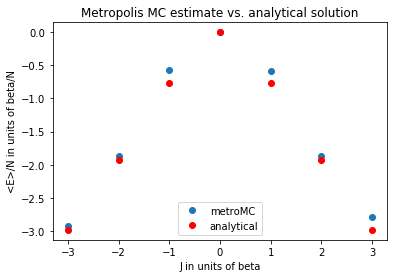

In [29]:
#100K trials
J_arr = np.arange(-3,3.5,1)
N=100
y_metroMC = []
y_analytical = []

for val in J_arr:
    print("Computing <E>/N for J = {}Beta".format(val))
    y_metroMC.append(metroMC(N=N,J=val,num_trials=100000))
    y_analytical.append(val*(1-2*(np.exp(val)/(np.exp(-val)+np.exp(val)))))
    print("Final Result: <E>/N empirical = {:.3}     <E>/N analytical = {:.3}".format(y_metroMC[-1],y_analytical[-1]))
    
residuals = np.asarray(y_metroMC)-np.asarray(y_analytical)
print("Standard error: {}".format(np.sum(residuals**2)))   
plt.plot(J_arr,y_metroMC,'o',label='metroMC')
plt.plot(J_arr,y_analytical,'ro',label='analytical')
plt.title("Metropolis MC estimate vs. analytical solution")
plt.xlabel('J in units of beta')
plt.ylabel('<E>/N in units of beta/N')
plt.legend(loc='lower center')
plt.show()


Computing <E>/N for J = -3.0Beta
Final Result: <E>/N empirical = -2.94     <E>/N analytical = -2.99
Computing <E>/N for J = -2.0Beta
Final Result: <E>/N empirical = -1.85     <E>/N analytical = -1.93
Computing <E>/N for J = -1.0Beta
Final Result: <E>/N empirical = -0.575     <E>/N analytical = -0.762
Computing <E>/N for J = 0.0Beta
Final Result: <E>/N empirical = -0.0     <E>/N analytical = 0.0
Computing <E>/N for J = 1.0Beta
Final Result: <E>/N empirical = -0.573     <E>/N analytical = -0.762
Computing <E>/N for J = 2.0Beta
Final Result: <E>/N empirical = -1.81     <E>/N analytical = -1.93
Computing <E>/N for J = 3.0Beta
Final Result: <E>/N empirical = -2.9     <E>/N analytical = -2.99
Standard error: 0.09967239308785407


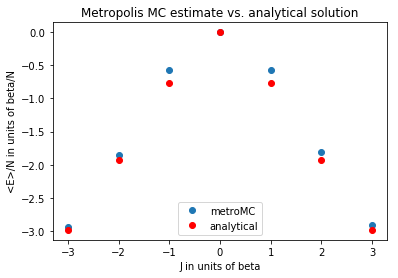

In [30]:
#500K trials
J_arr = np.arange(-3,3.5,1)
N=100
y_metroMC = []
y_analytical = []

for val in J_arr:
    print("Computing <E>/N for J = {}Beta".format(val))
    y_metroMC.append(metroMC(N=N,J=val,num_trials=500000))
    y_analytical.append(val*(1-2*(np.exp(val)/(np.exp(-val)+np.exp(val)))))
    print("Final Result: <E>/N empirical = {:.3}     <E>/N analytical = {:.3}".format(y_metroMC[-1],y_analytical[-1]))

residuals = np.asarray(y_metroMC)-np.asarray(y_analytical)
print("Standard error: {}".format(np.sum(residuals**2)))  
plt.plot(J_arr,y_metroMC,'o',label='metroMC')
plt.plot(J_arr,y_analytical,'ro',label='analytical')
plt.title("Metropolis MC estimate vs. analytical solution")
plt.xlabel('J in units of beta')
plt.ylabel('<E>/N in units of beta/N')
plt.legend(loc='lower center')
plt.show()
    